/Users/jaybinning/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


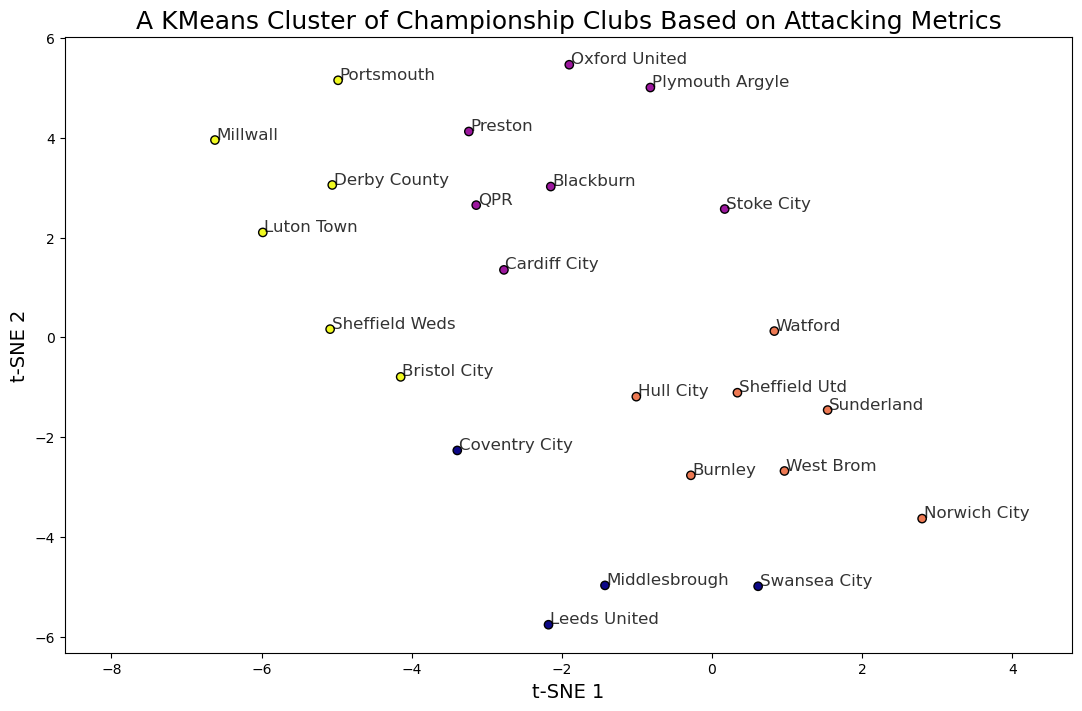

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

data = pd.read_excel('Attacking EFL Championship Data.xlsx')

data1 = data.drop('Squad', axis=1).values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1)

pca_model = PCA(n_components=10)
pca_data = pca_model.fit_transform(scaled_data)

tsne_model = TSNE(n_components=2, perplexity=10)
tsne_data = tsne_model.fit_transform(pca_data)

kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(tsne_data)
labels = kmeans_model.labels_

plt.figure(figsize=(13, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap='plasma', edgecolor='k')

for i, squad in enumerate(data['Squad']):  
    plt.text(tsne_data[i, 0] + 0.02,  
             tsne_data[i, 1] + 0.02,  
             squad, 
             fontsize=12, 
             color='black',  
             alpha=0.8)

x_min, x_max = tsne_data[:, 0].min(), tsne_data[:, 0].max()
plt.xlim(x_min - 2, x_max + 2)  

plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.title('A KMeans Cluster of Championship Clubs Based on Attacking Metrics', fontsize=18)

plt.show()
